In [32]:
from mnist import MNIST
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from tqdm import tqdm
from ipynb.fs.full.GradientDescent import costFunction
from ipynb.fs.full.GradientDescent import gradF
from ipynb.fs.full.GradientDescent import gradient_descent
from ipynb.fs.full.GradientDescent import selective_gradF

In [33]:
def load_dataset():
  mndata = MNIST('/home/mumu/Desktop/CSE546/hw2/data/python-mnist/data')
  X_train, labels_train = map(np.array, mndata.load_training())
  X_test, labels_test = map(np.array, mndata.load_testing())
  X_train = X_train/255.0
  X_test = X_test/255.0
  return X_test,labels_test,X_train,labels_train

In [34]:
X_test,labels_test,X_train,labels_train=load_dataset()

In [35]:
i, = np.where(labels_train==2)
j, = np.where(labels_train==7)
#new collection indices containing only 2 and 7 in the original order
ind = np.sort(np.r_[i,j])
################################# training set ########################
X_train_new = X_train[ind,:]
Y_train_new = labels_train[ind].astype(np.float32)
Y_train_new[Y_train_new ==2] =-1
Y_train_new[Y_train_new ==7] =1
################################# testing set ########################
i, = np.where(labels_test==2)
j, = np.where(labels_test==7)
#new collection indices containing only 2 and 7 in the original order
ind = np.sort(np.r_[i,j])
X_test_new = X_test[ind,:]
Y_test_new = labels_test[ind].astype(np.float32)
Y_test_new[Y_test_new ==2] =-1
Y_test_new[Y_test_new ==7] =1

In [5]:
#########################################################################
########################### part  BBBBBBB   #############################
#########################################################################

In [6]:
################################ training ################################
n,d = X_train_new.shape
theta_init = np.zeros(d+1)
lmbda = .1;
gradient = lambda theta : gradF(theta,X_train_new,Y_train_new,lmbda)
theta_train,theta_list_train,num_iteration_train = gradient_descent \
(theta_init,gradient,step_size=0.1, tolerence=0.001)


it takes 1788 iterations to converge


In [7]:
######################### getting J for each theta/Iteration #####################
J = lambda theta : costFunction(theta,X_train_new,Y_train_new,lmbda)
J_list_train = [J(theta) for theta in theta_list_train]

J = lambda theta : costFunction(theta,X_test_new,Y_test_new,lmbda)
J_list_test = [J(theta) for theta in theta_list_train]


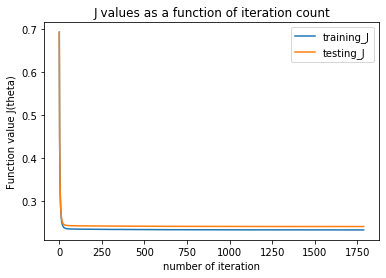

In [8]:
############################### plotting J vs. Iterations #########################
plt.plot(J_list_train)
plt.plot(J_list_test)
plt.title("J values as a function of iteration count")
plt.legend(["training_J","testing_J"])
plt.ylabel("Function value J(theta)")
plt.xlabel("number of iteration")
plt.savefig('A6_b_1')
plt.show()

In [9]:
#################################### calculating error rate #####################################
error_count_list_train = []
error_count_list_test = []
for theta_train in theta_list_train: 
    
    predicted_train = np.sign(np.c_[np.ones((X_train_new.shape[0],)),X_train_new] @ theta_train)
    predicted_test = np.sign(np.c_[np.ones((X_test_new.shape[0],)),X_test_new] @ theta_train)
    count = 0
    for a,b in zip (predicted_train,Y_train_new):
        if(a != b):
            count += 1
    error_count_list_train.append(count)
    
    count = 0
    for a,b in zip (predicted_test,Y_test_new):
        if(a != b):
            count += 1
    error_count_list_test.append(count)

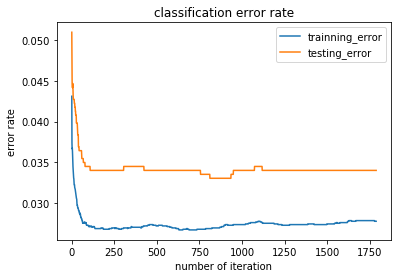

'\nas we designed, w_init = [b , w0,w1,w2....] = [0,0,0,0,.....], sign() returns 0\nnp.sign(np.c_[np.ones((X_train_new.shape[0],)),X_train_new] @ theta_list_train[0])\nnp.sign(np.c_[np.ones((X_test_new.shape[0],)),X_test_new] @ theta_list_train[0])\n'

In [17]:
#################################### plotting error ###############################################
n_train = X_train_new.shape[0]
n_test = X_test_new.shape[0]
plt.plot(np.arange(1,len(error_count_list_train)),np.array(error_count_list_train[1:])/(n_train-1))
plt.plot(np.arange(1,len(error_count_list_test)),np.array(error_count_list_test[1:])/(n_test-1))
plt.title('classification error rate')
plt.legend(["trainning_error","testing_error"])
plt.ylabel("error rate")
plt.xlabel("number of iteration")
plt.savefig('A6_b_2')
plt.show()

'''
as we designed, w_init = [b , w0,w1,w2....] = [0,0,0,0,.....], sign() returns 0
np.sign(np.c_[np.ones((X_train_new.shape[0],)),X_train_new] @ theta_list_train[0])
np.sign(np.c_[np.ones((X_test_new.shape[0],)),X_test_new] @ theta_list_train[0])
'''

In [18]:
#########################################################################
########################### part  CCCCCCCC  #############################
#########################################################################

In [39]:
################################ SGD #####################################################
m=1
n,d = X_train_new.shape
theta_init = np.zeros(d+1)
lmbda = .1;
selective_gradient = lambda theta : selective_gradF(theta,X_train_new,Y_train_new,lmbda,m)
theta_train_c,theta_list_train_c,num_iteration_train_c = gradient_descent \
(theta_init,selective_gradient,step_size=0.01, tolerence=0.025)

it takes 209 iterations to converge


In [40]:
######################### getting J for each theta/Iteration #####################
J = lambda theta : costFunction(theta,X_train_new,Y_train_new,lmbda)
J_list_train = [J(theta) for theta in theta_list_train_c]

J = lambda theta : costFunction(theta,X_test_new,Y_test_new,lmbda)
J_list_test = [J(theta) for theta in theta_list_train_c]


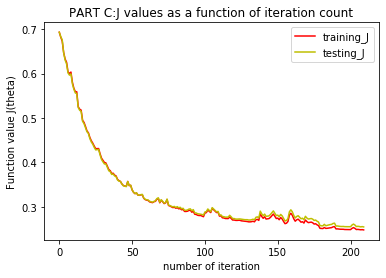

In [41]:
############################### plotting J vs. Iterations #########################
plt.plot(J_list_train,'r-')
plt.plot(J_list_test,'y-')
plt.title("PART C:J values as a function of iteration count")
plt.ylabel("Function value J(theta)")
plt.xlabel("number of iteration")

plt.legend(["training_J","testing_J"])

plt.savefig('A6_c_1')
plt.show()

In [42]:
#################################### calculating error rate #####################################
error_count_list_train_c = []
error_count_list_test_c = []
for theta_train in theta_list_train_c: 
    
    predicted_train_c = np.sign(np.c_[np.ones((X_train_new.shape[0],)),X_train_new] @ theta_train)
    predicted_test_c = np.sign(np.c_[np.ones((X_test_new.shape[0],)),X_test_new] @ theta_train)
    count = 0
    for a,b in zip (predicted_train_c,Y_train_new):
        if(a != b):
            count += 1
    error_count_list_train_c.append(count)
    
    count = 0
    for a,b in zip (predicted_test_c,Y_test_new):
        if(a != b):
            count += 1
    error_count_list_test_c.append(count)

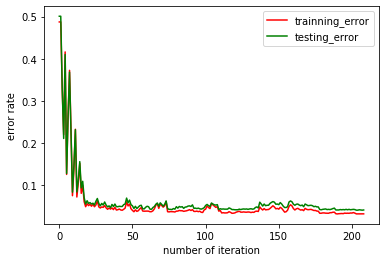

In [43]:
#################################### plotting error ###############################################
n_train = X_train_new.shape[0]
n_test = X_test_new.shape[0]
plt.plot(np.array(error_count_list_train_c[1:])/n_train,'r-')
plt.plot(np.array(error_count_list_test_c[1:])/n_test,'g-')

plt.legend(["trainning_error","testing_error"])
plt.ylabel("error rate")
plt.xlabel("number of iteration")
plt.savefig('A6_c_2')
plt.show()

# as we designed, w_init = [b , w0,w1,w2....] = [0,0,0,0,.....], sign() returns 0
# np.sign(np.c_[np.ones((X_train_new.shape[0],)),X_train_new] @ theta_list_train[0])
# np.sign(np.c_[np.ones((X_test_new.shape[0],)),X_test_new] @ theta_list_train[0])


In [37]:
#########################################################################
########################### part  DDDDDDDD  #############################
#########################################################################

In [27]:
################################ SGD #####################################################
m=100
n,d = X_train_new.shape
theta_init = np.zeros(d+1)
lmbda = .1;
selective_gradient = lambda theta : selective_gradF(theta,X_train_new,Y_train_new,lmbda,m)
theta_train_d,theta_list_train_d,num_iteration_train_d = gradient_descent \
(theta_init,selective_gradient,step_size=0.01, tolerence=0.01)

it takes 1638 iterations to converge


In [28]:
######################### getting J for each theta/Iteration #####################
J = lambda theta : costFunction(theta,X_train_new,Y_train_new,lmbda)
J_list_train = [J(theta) for theta in theta_list_train_d]

J = lambda theta : costFunction(theta,X_test_new,Y_test_new,lmbda)
J_list_test = [J(theta) for theta in theta_list_train_d]


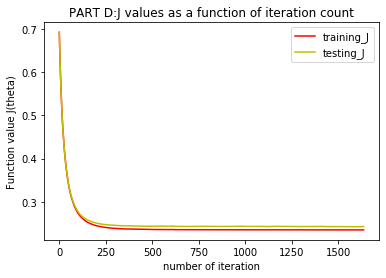

In [29]:
############################### plotting J vs. Iterations #########################
plt.plot(J_list_train,'r-')
plt.plot(J_list_test,'y-')
plt.title("PART D:J values as a function of iteration count")
plt.ylabel("Function value J(theta)")
plt.xlabel("number of iteration")

plt.legend(["training_J","testing_J"])

plt.savefig('A6_d_1')
plt.show()

In [30]:
#################################### calculating error rate #####################################
error_count_list_train_d = []
error_count_list_test_d = []
for theta_train in theta_list_train_d: 
    
    predicted_train_d = np.sign(np.c_[np.ones((X_train_new.shape[0],)),X_train_new] @ theta_train)
    predicted_test_d = np.sign(np.c_[np.ones((X_test_new.shape[0],)),X_test_new] @ theta_train)
    count = 0
    for a,b in zip (predicted_train_d,Y_train_new):
        if(a != b):
            count += 1
    error_count_list_train_d.append(count)
    
    count = 0
    for a,b in zip (predicted_test_d,Y_test_new):
        if(a != b):
            count += 1
    error_count_list_test_d.append(count)

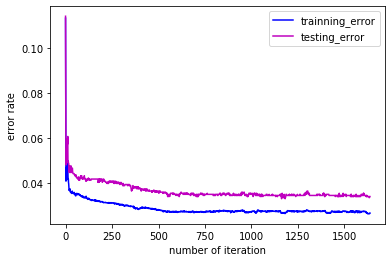

In [31]:
#################################### plotting error ###############################################
n_train = X_train_new.shape[0]
n_test = X_test_new.shape[0]
plt.plot(np.array(error_count_list_train_d[1:])/n_train,'b-')
plt.plot(np.array(error_count_list_test_d[1:])/n_test,'m-')


plt.legend(["trainning_error","testing_error"])
plt.ylabel("error rate")
plt.xlabel("number of iteration")
plt.savefig('A6_d_2')
plt.show()
# as we designed, w_init = [b , w0,w1,w2....] = [0,0,0,0,.....], sign() returns 0
# np.sign(np.c_[np.ones((X_train_new.shape[0],)),X_train_new] @ theta_list_train[0])
# np.sign(np.c_[np.ones((X_test_new.shape[0],)),X_test_new] @ theta_list_train[0])
